In [1]:
import pandas as pd
import io
import requests

s=requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv").content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),error_bad_lines=False)

In [30]:
X,y=pd.DataFrame(data.iloc[:,1:-1].values),pd.DataFrame(data.iloc[:,-1].values)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [32]:
from sklearn.cluster import MiniBatchKMeans
batch_size=3000
print('No. of instances',len(X))#Incremental for instances greater than 10000
mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)

No. of instances 11500


In [33]:
import time
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0
print(t_mini_batch)
y_pred=mbk.predict(X)

1.1950042247772217


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X=pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print('Total variance covered: ',sum(pca.explained_variance_ratio_))

[ 0.05607206]
Total variance covered:  0.0560720589194


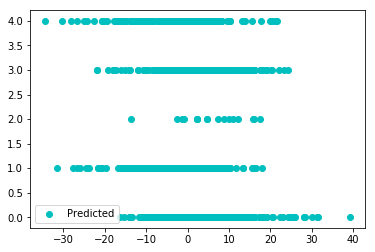

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X,y_pred,color='c')
plt.legend(['Predicted'])
plt.show()

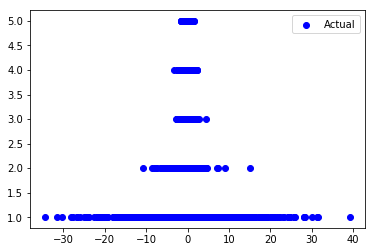

In [40]:
plt.scatter(X,y,color='b')
plt.legend(['Actual'])
plt.show()
